## BDLN PROJECT
ID: 108998405
Name: BADIGINENI MUKESH KUMAR


In [1]:
import glob
import numpy as np
import os
import shutil
np.random.seed(42)

In [2]:
#loading the files
files=glob.glob('train/*')
cat_files=[fn for fn in files if 'cat' in fn]
dog_files=[fn for fn in files if 'dog' in fn]
len(cat_files),len(dog_files)

(12500, 12500)

In [3]:
#creating a smaller dataset
cat_train = np.random.choice(cat_files, size=1500, replace=False)
dog_train = np.random.choice(dog_files, size=1500, replace=False)
cat_files = list(set(cat_files) - set(cat_train))
dog_files = list(set(dog_files) - set(dog_train))
cat_val = np.random.choice(cat_files, size=500, replace=False)
dog_val = np.random.choice(dog_files, size=500, replace=False)
cat_files = list(set(cat_files) - set(cat_val))
dog_files = list(set(dog_files) - set(dog_val))
cat_test = np.random.choice(cat_files, size=500, replace=False)
dog_test = np.random.choice(dog_files, size=500, replace=False)
print('Cat datasets:', cat_train.shape, cat_val.shape, cat_test.shape)
print('Dog datasets:', dog_train.shape, dog_val.shape, dog_test.shape)

Cat datasets: (1500,) (500,) (500,)
Dog datasets: (1500,) (500,) (500,)


In [4]:
#creating a local separate storage for each type

train_dir = 'training_data'
val_dir = 'validation_data'
test_dir = 'test_data'
train_files = np.concatenate([cat_train, dog_train])
validate_files = np.concatenate([cat_val, dog_val])
test_files = np.concatenate([cat_test, dog_test])
os.mkdir(train_dir) if not os.path.isdir(train_dir) else None
os.mkdir(val_dir) if not os.path.isdir(val_dir) else None
os.mkdir(test_dir) if not os.path.isdir(test_dir) else None
for fn in train_files:
    shutil.copy(fn, train_dir)
for fn in validate_files:
    shutil.copy(fn, val_dir)   
for fn in test_files:
    shutil.copy(fn, test_dir)

In [5]:
#loading the dependencies
import glob
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img
%matplotlib inline

Using TensorFlow backend.
C:\Users\Mukesh Badigineni\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Mukesh Badigineni\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Mukesh Badigineni\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.in

In [6]:
#load the seprated datsets
IMG_DIM = (150, 150)
train_files = glob.glob('training_data/*')
train_imgs = [img_to_array(load_img(img, target_size=IMG_DIM)) for img in train_files]
train_imgs = np.array(train_imgs)
train_labels = [fn.split('\\')[1].split('.')[0].strip() for fn in train_files]
validation_files = glob.glob('validation_data/*')
validation_imgs = [img_to_array(load_img(img, target_size=IMG_DIM)) for img in validation_files]
validation_imgs = np.array(validation_imgs)
validation_labels = [fn.split('\\')[1].split('.')[0].strip() for fn in validation_files]
print('Train dataset shape:', train_imgs.shape, 
      '\tValidation dataset shape:', validation_imgs.shape)

Train dataset shape: (3000, 150, 150, 3) 	Validation dataset shape: (1000, 150, 150, 3)


(150, 150, 3)


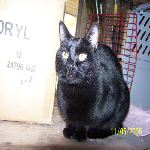

In [7]:
#downscaling the image
train_imgs_scaled = train_imgs.astype('float32')
validation_imgs_scaled  = validation_imgs.astype('float32')
train_imgs_scaled /= 255
validation_imgs_scaled /= 255
print(train_imgs[0].shape)
array_to_img(train_imgs[0])

In [8]:
#encode text class labels to numeric values
batch_size = 30
num_classes = 2
epochs = 30
input_shape = (150, 150, 3)
# encode text category labels
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(train_labels)
train_labels_enc = le.transform(train_labels)
validation_labels_enc = le.transform(validation_labels)
print(train_labels[1495:1505], train_labels_enc[1495:1505])

['cat', 'cat', 'cat', 'cat', 'cat', 'dog', 'dog', 'dog', 'dog', 'dog'] [0 0 0 0 0 1 1 1 1 1]


In [9]:
#CNN Model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.models import Sequential
from keras import optimizers
model = Sequential()
model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(),
              metrics=['accuracy'])
model.summary()


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        9280      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________

In [10]:
#model training

history = model.fit(x=train_imgs_scaled, y=train_labels_enc,
                    validation_data=(validation_imgs_scaled, validation_labels_enc),
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1)


Train on 3000 samples, validate on 1000 samples
Epoch 1/30
3000/3000 [==============================] - 61s 20ms/step - loss: 1.1227 - accuracy: 0.5610 - val_loss: 0.6584 - val_accuracy: 0.5400
Epoch 2/30
3000/3000 [==============================] - 60s 20ms/step - loss: 0.6569 - accuracy: 0.6583 - val_loss: 0.5877 - val_accuracy: 0.7080
Epoch 3/30
3000/3000 [==============================] - 60s 20ms/step - loss: 0.5595 - accuracy: 0.7110 - val_loss: 0.7079 - val_accuracy: 0.6130
Epoch 4/30
3000/3000 [==============================] - 61s 20ms/step - loss: 0.4782 - accuracy: 0.7807 - val_loss: 0.5148 - val_accuracy: 0.7400
Epoch 5/30
3000/3000 [==============================] - 62s 21ms/step - loss: 0.3921 - accuracy: 0.8223 - val_loss: 0.5948 - val_accuracy: 0.7330
Epoch 6/30
3000/3000 [==============================] - 62s 21ms/step - loss: 0.2911 - accuracy: 0.8743 - val_loss: 0.5735 - val_accuracy: 0.7400
Epoch 7/30
3000/3000 [==============================] - 61s 20ms/step - los

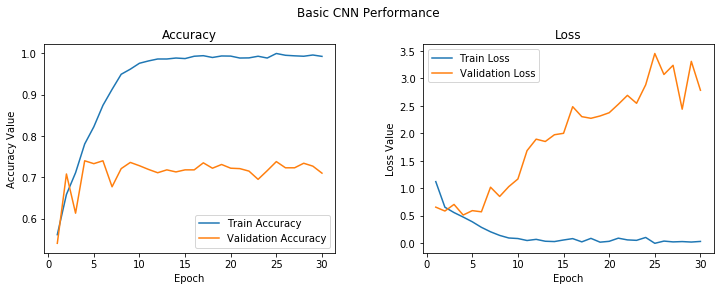

In [11]:
#plotting the validation vs accuracy losses
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Basic CNN Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)
epoch_list = list(range(1,31))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 31, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")
ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 31, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [12]:
#CNN Model With Regularization
model = Sequential()
model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(),
              metrics=['accuracy'])                            
history = model.fit(x=train_imgs_scaled, y=train_labels_enc,
                    validation_data=(validation_imgs_scaled, validation_labels_enc),
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1)  

Train on 3000 samples, validate on 1000 samples
Epoch 1/30
3000/3000 [==============================] - 51s 17ms/step - loss: 0.7064 - accuracy: 0.5307 - val_loss: 0.6718 - val_accuracy: 0.6260
Epoch 2/30
3000/3000 [==============================] - 49s 16ms/step - loss: 0.6653 - accuracy: 0.5993 - val_loss: 0.6019 - val_accuracy: 0.6870
Epoch 3/30
3000/3000 [==============================] - 49s 16ms/step - loss: 0.6256 - accuracy: 0.6447 - val_loss: 0.5938 - val_accuracy: 0.6720
Epoch 4/30
3000/3000 [==============================] - 47s 16ms/step - loss: 0.5997 - accuracy: 0.6657 - val_loss: 0.5663 - val_accuracy: 0.7070
Epoch 5/30
3000/3000 [==============================] - 45s 15ms/step - loss: 0.5809 - accuracy: 0.7020 - val_loss: 0.5503 - val_accuracy: 0.7690
Epoch 6/30
3000/3000 [==============================] - 44s 15ms/step - loss: 0.5318 - accuracy: 0.7377 - val_loss: 0.4993 - val_accuracy: 0.7640
Epoch 7/30
3000/3000 [==============================] - 44s 15ms/step - loss

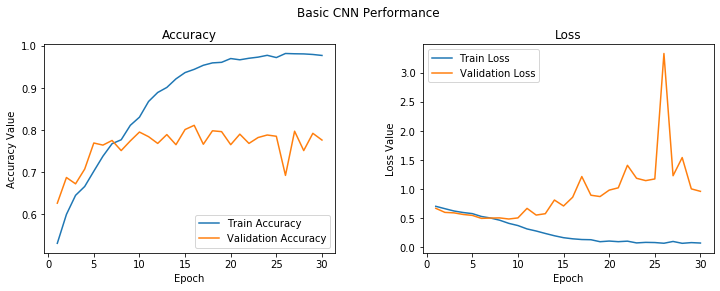

In [13]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Basic CNN Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)
epoch_list = list(range(1,31))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 31, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")
ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 31, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [14]:
#model.save('cats_dogs_basic_cnn.h5')

In [15]:
#CNN Model with image augmentation

train_datagen = ImageDataGenerator(rescale=1./255, zoom_range=0.3, rotation_range=50,
                                   width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, 
                                   horizontal_flip=True, fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1./255)

Labels: ['cat', 'cat', 'cat', 'cat', 'cat']


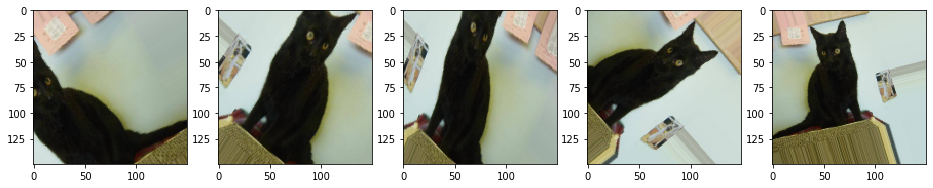

In [16]:
img_id = 1007
cat_generator = train_datagen.flow(train_imgs[img_id:img_id+1], train_labels[img_id:img_id+1],
                                   batch_size=1)
cat = [next(cat_generator) for i in range(0,5)]
fig, ax = plt.subplots(1,5, figsize=(16, 6))
print('Labels:', [item[1][0] for item in cat])
l = [ax[i].imshow(cat[i][0][0]) for i in range(0,5)]

Labels: ['dog', 'dog', 'dog', 'dog', 'dog']


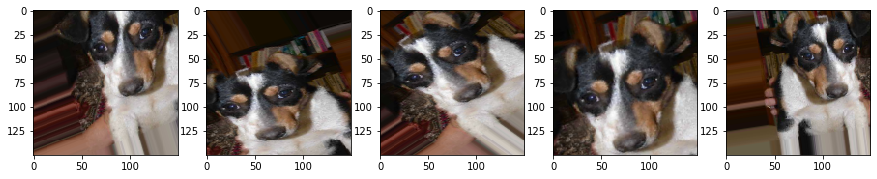

In [17]:
img_id = 1997
dog_generator = train_datagen.flow(train_imgs[img_id:img_id+1], train_labels[img_id:img_id+1],
                                   batch_size=1)
dog = [next(dog_generator) for i in range(0,5)]
fig, ax = plt.subplots(1,5, figsize=(15, 6))
print('Labels:', [item[1][0] for item in dog])
l = [ax[i].imshow(dog[i][0][0]) for i in range(0,5)]

In [18]:
#CNN Model With regularization using the image augmentation data
train_generator = train_datagen.flow(train_imgs, train_labels_enc, batch_size=30)
val_generator = val_datagen.flow(validation_imgs, validation_labels_enc, batch_size=20)
input_shape = (150, 150, 3)

from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.models import Sequential
from keras import optimizers

model = Sequential()

model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['accuracy'])
              
history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=100,
                              validation_data=val_generator, validation_steps=50, 
                              verbose=1)              

Epoch 1/100
100/100 [==============================] - 47s 472ms/step - loss: 0.6933 - accuracy: 0.5073 - val_loss: 0.6945 - val_accuracy: 0.5010
Epoch 2/100
100/100 [==============================] - 46s 464ms/step - loss: 0.6847 - accuracy: 0.5537 - val_loss: 0.7280 - val_accuracy: 0.5850
Epoch 3/100
100/100 [==============================] - 47s 466ms/step - loss: 0.6672 - accuracy: 0.5800 - val_loss: 0.5862 - val_accuracy: 0.6120
Epoch 4/100
100/100 [==============================] - 46s 464ms/step - loss: 0.6555 - accuracy: 0.6037 - val_loss: 0.6300 - val_accuracy: 0.6080
Epoch 5/100
100/100 [==============================] - 46s 462ms/step - loss: 0.6427 - accuracy: 0.6313 - val_loss: 0.7852 - val_accuracy: 0.5670
Epoch 6/100
100/100 [==============================] - 46s 463ms/step - loss: 0.6363 - accuracy: 0.6270 - val_loss: 0.6014 - val_accuracy: 0.6240
Epoch 7/100
100/100 [==============================] - 46s 463ms/step - loss: 0.6272 - accuracy: 0.6423 - val_loss: 0.7101 -

Epoch 57/100
100/100 [==============================] - 46s 464ms/step - loss: 0.4439 - accuracy: 0.7927 - val_loss: 0.3325 - val_accuracy: 0.8030
Epoch 58/100
100/100 [==============================] - 46s 462ms/step - loss: 0.4402 - accuracy: 0.7890 - val_loss: 0.4589 - val_accuracy: 0.8180
Epoch 59/100
100/100 [==============================] - 47s 468ms/step - loss: 0.4349 - accuracy: 0.8000 - val_loss: 0.4739 - val_accuracy: 0.8100
Epoch 60/100
100/100 [==============================] - 47s 465ms/step - loss: 0.4312 - accuracy: 0.8027 - val_loss: 0.4806 - val_accuracy: 0.8410
Epoch 61/100
100/100 [==============================] - 47s 466ms/step - loss: 0.4335 - accuracy: 0.7990 - val_loss: 0.3297 - val_accuracy: 0.8160
Epoch 62/100
100/100 [==============================] - 46s 464ms/step - loss: 0.4403 - accuracy: 0.7993 - val_loss: 0.1776 - val_accuracy: 0.8160
Epoch 63/100
100/100 [==============================] - 47s 466ms/step - loss: 0.4355 - accuracy: 0.7920 - val_loss: 0

ValueError: x and y must have same first dimension, but have shapes (30,) and (100,)

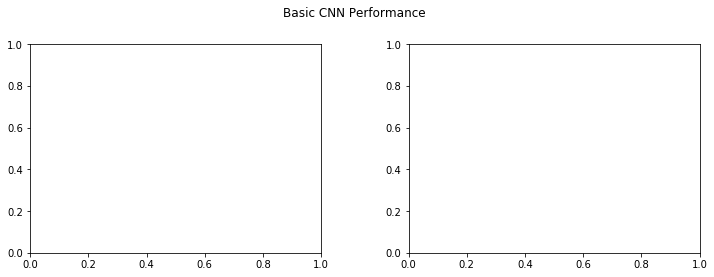

In [19]:
from keras import callbacks
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Basic CNN Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)
epoch_list = list(range(1,31))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 31, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")
ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 31, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [20]:
#pretrained CNN Model as feature extractor
from keras.applications import vgg16
from keras.models import Model
import keras

vgg = vgg16.VGG16(include_top=False, weights='imagenet', 
                                     input_shape=input_shape)

output = vgg.layers[-1].output
output = keras.layers.Flatten()(output)
vgg_model = Model(vgg.input, output)

vgg_model.trainable = False
for layer in vgg_model.layers:
    layer.trainable = False
    
import pandas as pd
pd.set_option('max_colwidth', -1)
layers = [(layer, layer.name, layer.trainable) for layer in vgg_model.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])    

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.


,Layer Type,Layer Name,Layer Trainable
0,<keras.engine.input_layer.InputLayer object at 0x0000019DD8E26C88>,input_1,False
1,<keras.layers.convolutional.Conv2D object at 0x0000019DD7828E08>,block1_conv1,False
2,<keras.layers.convolutional.Conv2D object at 0x0000019DD8E26A88>,block1_conv2,False
3,<keras.layers.pooling.MaxPooling2D object at 0x0000019D5CE806C8>,block1_pool,False
4,<keras.layers.convolutional.Conv2D object at 0x0000019D5CE9E708>,block2_conv1,False
5,<keras.layers.convolutional.Conv2D object at 0x0000019D5CEBCCC8>,block2_conv2,False
6,<keras.layers.pooling.MaxPooling2D object at 0x0000019D5CEE3808>,block2_pool,False
7,<keras.layers.convolutional.Conv2D object at 0x0000019DD5C52688>,block3_conv1,False
8,<keras.layers.convolutional.Conv2D object at 0x0000019D5CF15D08>,block3_conv2,False
9,<keras.layers.convolutional.Conv2D object at 0x0000019D5CF3F288>,block3_conv3,False


(1, 4, 4, 512)


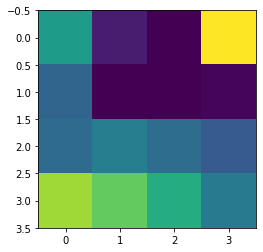

In [21]:
bottleneck_feature_example = vgg.predict(train_imgs_scaled[0:1])
print(bottleneck_feature_example.shape)
plt.imshow(bottleneck_feature_example[0][:,:,0])

In [22]:

def get_bottleneck_features(model, input_imgs):
    features = model.predict(input_imgs, verbose=0)
    return features
    
train_features_vgg = get_bottleneck_features(vgg_model, train_imgs_scaled)
validation_features_vgg = get_bottleneck_features(vgg_model, validation_imgs_scaled)

print('Train Bottleneck Features:', train_features_vgg.shape, 
      '\tValidation Bottleneck Features:', validation_features_vgg.shape)

Train Bottleneck Features: (3000, 8192) 	Validation Bottleneck Features: (1000, 8192)


In [23]:
#Building the architecure
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
from keras.models import Sequential
from keras import optimizers

input_shape = vgg_model.output_shape[1]

model = Sequential()
model.add(InputLayer(input_shape=(input_shape,)))
model.add(Dense(512, activation='relu', input_dim=input_shape))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['accuracy'])

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 512)               4194816   
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_6 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 513       
Total params: 4,457,985
Trainable params: 4,457,985
Non-trainable params: 0
_________________________________________________________________


In [24]:
#Training again 
history = model.fit(x=train_features_vgg, y=train_labels_enc,
                    validation_data=(validation_features_vgg, validation_labels_enc),
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1)

Train on 3000 samples, validate on 1000 samples
Epoch 1/30
3000/3000 [==============================] - 5s 2ms/step - loss: 0.4336 - accuracy: 0.7887 - val_loss: 0.3075 - val_accuracy: 0.8790
Epoch 2/30
3000/3000 [==============================] - 5s 2ms/step - loss: 0.2835 - accuracy: 0.8773 - val_loss: 0.2747 - val_accuracy: 0.8810
Epoch 3/30
3000/3000 [==============================] - 5s 2ms/step - loss: 0.2236 - accuracy: 0.9127 - val_loss: 0.2432 - val_accuracy: 0.8980
Epoch 4/30
3000/3000 [==============================] - 5s 2ms/step - loss: 0.1953 - accuracy: 0.9243 - val_loss: 0.2565 - val_accuracy: 0.8950
Epoch 5/30
3000/3000 [==============================] - 5s 2ms/step - loss: 0.1854 - accuracy: 0.9240 - val_loss: 0.2703 - val_accuracy: 0.8870
Epoch 6/30
3000/3000 [==============================] - 5s 2ms/step - loss: 0.1445 - accuracy: 0.9397 - val_loss: 0.2352 - val_accuracy: 0.9130
Epoch 7/30
3000/3000 [==============================] - 5s 2ms/step - loss: 0.1276 - acc

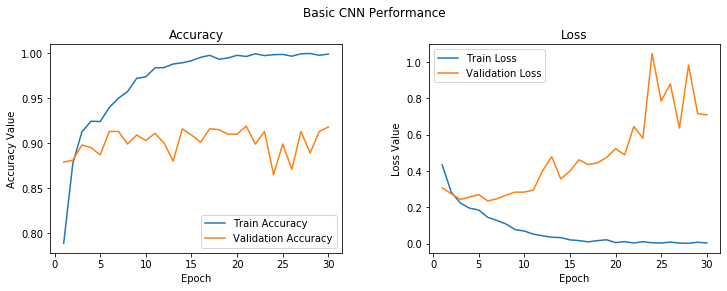

In [25]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Basic CNN Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)
epoch_list = list(range(1,31))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 31, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")
ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 31, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [26]:
#model.save('cats_dogs_tlearn_basic_cnn.h5')

In [27]:
#Pre-trained CNN model as a Feature Extractor with Image Augmentation
train_datagen = ImageDataGenerator(rescale=1./255, zoom_range=0.3, rotation_range=50,
                                   width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, 
                                   horizontal_flip=True, fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow(train_imgs, train_labels_enc, batch_size=30)
val_generator = val_datagen.flow(validation_imgs, validation_labels_enc, batch_size=20)

In [28]:
#VGG_16 Model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
from keras.models import Sequential
from keras import optimizers

model = Sequential()
model.add(vgg_model)
model.add(Dense(512, activation='relu', input_dim=input_shape))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['accuracy'])
              
history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=100,
                              validation_data=val_generator, validation_steps=50, 
                              verbose=1)              

Epoch 1/100
100/100 [==============================] - 252s 3s/step - loss: 0.6446 - accuracy: 0.6240 - val_loss: 0.5816 - val_accuracy: 0.7920
Epoch 2/100
100/100 [==============================] - 257s 3s/step - loss: 0.5614 - accuracy: 0.7067 - val_loss: 0.6402 - val_accuracy: 0.8170
Epoch 3/100
100/100 [==============================] - 255s 3s/step - loss: 0.5172 - accuracy: 0.7460 - val_loss: 0.2862 - val_accuracy: 0.8450
Epoch 4/100
100/100 [==============================] - 255s 3s/step - loss: 0.4838 - accuracy: 0.7647 - val_loss: 0.3830 - val_accuracy: 0.8580
Epoch 5/100
100/100 [==============================] - 256s 3s/step - loss: 0.4519 - accuracy: 0.7810 - val_loss: 0.2897 - val_accuracy: 0.8540
Epoch 6/100
100/100 [==============================] - 255s 3s/step - loss: 0.4295 - accuracy: 0.8033 - val_loss: 0.1335 - val_accuracy: 0.8710
Epoch 7/100
100/100 [==============================] - 255s 3s/step - loss: 0.4152 - accuracy: 0.8023 - val_loss: 0.2209 - val_accuracy:

100/100 [==============================] - 251s 3s/step - loss: 0.3084 - accuracy: 0.8617 - val_loss: 0.0952 - val_accuracy: 0.9040
Epoch 58/100
100/100 [==============================] - 251s 3s/step - loss: 0.3045 - accuracy: 0.8707 - val_loss: 0.2868 - val_accuracy: 0.9100
Epoch 59/100
100/100 [==============================] - 251s 3s/step - loss: 0.3001 - accuracy: 0.8730 - val_loss: 0.0588 - val_accuracy: 0.9090
Epoch 60/100
100/100 [==============================] - 251s 3s/step - loss: 0.2998 - accuracy: 0.8687 - val_loss: 0.1878 - val_accuracy: 0.9120
Epoch 61/100
100/100 [==============================] - 251s 3s/step - loss: 0.3123 - accuracy: 0.8667 - val_loss: 0.1459 - val_accuracy: 0.9050
Epoch 62/100
100/100 [==============================] - 251s 3s/step - loss: 0.2857 - accuracy: 0.8790 - val_loss: 0.1703 - val_accuracy: 0.9090
Epoch 63/100
100/100 [==============================] - 252s 3s/step - loss: 0.2897 - accuracy: 0.8770 - val_loss: 0.6814 - val_accuracy: 0.904

ValueError: x and y must have same first dimension, but have shapes (30,) and (100,)

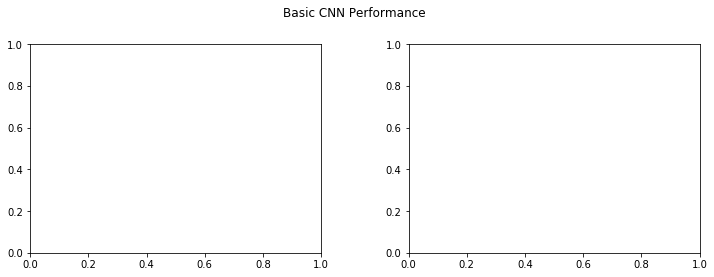

In [29]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Basic CNN Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)
epoch_list = list(range(1,31))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 31, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")
ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 31, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [30]:
#fine tuned image augmentation
vgg_model.trainable = True

set_trainable = False
for layer in vgg_model.layers:
    if layer.name in ['block5_conv1', 'block4_conv1']:
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False
        
layers = [(layer, layer.name, layer.trainable) for layer in vgg_model.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])  

,Layer Type,Layer Name,Layer Trainable
0,<keras.engine.input_layer.InputLayer object at 0x0000019DD8E26C88>,input_1,False
1,<keras.layers.convolutional.Conv2D object at 0x0000019DD7828E08>,block1_conv1,False
2,<keras.layers.convolutional.Conv2D object at 0x0000019DD8E26A88>,block1_conv2,False
3,<keras.layers.pooling.MaxPooling2D object at 0x0000019D5CE806C8>,block1_pool,False
4,<keras.layers.convolutional.Conv2D object at 0x0000019D5CE9E708>,block2_conv1,False
5,<keras.layers.convolutional.Conv2D object at 0x0000019D5CEBCCC8>,block2_conv2,False
6,<keras.layers.pooling.MaxPooling2D object at 0x0000019D5CEE3808>,block2_pool,False
7,<keras.layers.convolutional.Conv2D object at 0x0000019DD5C52688>,block3_conv1,False
8,<keras.layers.convolutional.Conv2D object at 0x0000019D5CF15D08>,block3_conv2,False
9,<keras.layers.convolutional.Conv2D object at 0x0000019D5CF3F288>,block3_conv3,False


In [31]:
train_datagen = ImageDataGenerator(rescale=1./255, zoom_range=0.3, rotation_range=50,
                                   width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, 
                                   horizontal_flip=True, fill_mode='nearest')
val_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow(train_imgs, train_labels_enc, batch_size=30)
val_generator = val_datagen.flow(validation_imgs, validation_labels_enc, batch_size=20)

from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
from keras.models import Sequential
from keras import optimizers

model = Sequential()
model.add(vgg_model)
model.add(Dense(512, activation='relu', input_dim=input_shape))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-5),
              metrics=['accuracy'])
              
history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=100,
                              validation_data=val_generator, validation_steps=50, 
                              verbose=1)              

Epoch 1/100
100/100 [==============================] - 390s 4s/step - loss: 0.5938 - accuracy: 0.6660 - val_loss: 0.1909 - val_accuracy: 0.8480
Epoch 2/100
100/100 [==============================] - 409s 4s/step - loss: 0.4302 - accuracy: 0.8140 - val_loss: 0.3094 - val_accuracy: 0.8990
Epoch 3/100
100/100 [==============================] - 412s 4s/step - loss: 0.3466 - accuracy: 0.8557 - val_loss: 0.3540 - val_accuracy: 0.8780
Epoch 4/100
100/100 [==============================] - 408s 4s/step - loss: 0.2952 - accuracy: 0.8710 - val_loss: 0.4278 - val_accuracy: 0.9350
Epoch 5/100
100/100 [==============================] - 406s 4s/step - loss: 0.2547 - accuracy: 0.8940 - val_loss: 0.0892 - val_accuracy: 0.9450
Epoch 6/100
100/100 [==============================] - 405s 4s/step - loss: 0.2379 - accuracy: 0.9057 - val_loss: 0.0361 - val_accuracy: 0.9420
Epoch 7/100
100/100 [==============================] - 406s 4s/step - loss: 0.2321 - accuracy: 0.9050 - val_loss: 0.1017 - val_accuracy:

KeyboardInterrupt: 

In [34]:
#Evaluating on Test Data
predictions = basic_cnn.predict_classes(test_imgs_scaled, verbose=0)
predictions = num2class_label_transformer(predictions)
meu.display_model_performance_metrics(true_labels=test_labels, predicted_labels=predictions, 
                                      classes=list(set(test_labels)))

NameError: name 'test_imgs_scaled' is not defined